# 단순 챗봇을 Langgraph로 만들기

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

## 1. 상태를 정의하기

- state 정의
- 이름이나 대화내용 설정

```
uv add langgraph
```

In [2]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
# [대화내용] = [] -> 단계가 진행될때마다 대화내용.append(ai 답변, human 답변, 툴 사용내용)

In [ ]:
# 지금까지 나눴던 대화 내용
class BasicState(TypedDict):
    messages : Annotated[list, add_messages]

## 2. 상태에 기반한 노드 정의

In [5]:
from langchain_openai import ChatOpenAI

# 모델
model = ChatOpenAI(
    model = "gpt-4.1-mini",
    temperature = 0
)

# 기본 함수 정의 (대화내용 다루는 함수)
# BasicState : 지금까지 나눴던 대화 내용 -> chat() : 대화내용 다루는 함수 -> 다시 BasicState에 저장
def chat(state: BasicState):
    return {"messages" : [model.invoke(state["messages"])]}

## 3. 그래프 정의 및 노드 추가

In [4]:
# 그래프 생성해보기
graph_builder = StateGraph(BasicState)
graph_builder.__dict__

{'nodes': {},
 'edges': set(),
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.BasicState: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x14c1de19440>}},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x14c1de19440>},
 'managed': {},
 'compiled': False,
 'waiting_edges': set(),
 'state_schema': __main__.BasicState,
 'input_schema': __main__.BasicState,
 'output_schema': __main__.BasicState,
 'context_schema': None}

In [6]:
graph_builder.add_node("graphChatbot", chat)
graph_builder.__dict__

{'nodes': {'graphChatbot': StateNodeSpec(runnable=graphChatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class '__main__.BasicState'>, retry_policy=None, cache_policy=None, ends=(), defer=False)},
 'edges': set(),
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.BasicState: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x14c1de19440>}},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x14c1de19440>},
 'managed': {},
 'compiled': False,
 'waiting_edges': set(),
 'state_schema': __main__.BasicState,
 'input_schema': __main__.BasicState,
 'output_schema': __main__.BasicState,
 'context_schema': None}

## 4. 엣지 추가하기

In [7]:
graph_builder.add_edge(START, "graphChatbot")
graph_builder.__dict__

{'nodes': {'graphChatbot': StateNodeSpec(runnable=graphChatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class '__main__.BasicState'>, retry_policy=None, cache_policy=None, ends=(), defer=False)},
 'edges': {('__start__', 'graphChatbot')},
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.BasicState: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x14c1de19440>}},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x14c1de19440>},
 'managed': {},
 'compiled': False,
 'waiting_edges': set(),
 'state_schema': __main__.BasicState,
 'input_schema': __main__.BasicState,
 'output_schema': __main__.BasicState,
 'context_schema': None}

In [8]:
graph_builder.add_edge("graphChatbot", END)
graph_builder.__dict__

{'nodes': {'graphChatbot': StateNodeSpec(runnable=graphChatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class '__main__.BasicState'>, retry_policy=None, cache_policy=None, ends=(), defer=False)},
 'edges': {('__start__', 'graphChatbot'), ('graphChatbot', '__end__')},
 'branches': defaultdict(dict, {}),
 'schemas': {__main__.BasicState: {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x14c1de19440>}},
 'channels': {'messages': <langgraph.channels.binop.BinaryOperatorAggregate at 0x14c1de19440>},
 'managed': {},
 'compiled': False,
 'waiting_edges': set(),
 'state_schema': __main__.BasicState,
 'input_schema': __main__.BasicState,
 'output_schema': __main__.BasicState,
 'context_schema': None}

## 5. 그림으로 보기

In [9]:
graph = graph_builder.compile()

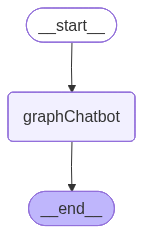

In [10]:
graph

In [11]:
question = "오늘 석촌역에서 하는 행사가 뭐야?"
result = graph.invoke({"messages" : [("user", question)]})

In [12]:
print(result)

{'messages': [HumanMessage(content='오늘 석촌역에서 하는 행사가 뭐야?', additional_kwargs={}, response_metadata={}, id='16be7e3d-f95b-4d8c-8548-32b0676606ce'), AIMessage(content='죄송하지만 오늘 석촌역에서 어떤 행사가 있는지에 대한 실시간 정보는 제공해드리기 어렵습니다. 석촌역 인근의 행사 정보를 확인하시려면 서울시 공식 홈페이지나 석촌역 인근 상가, 지역 커뮤니티, 또는 SNS를 참고해 보시는 것을 추천드립니다. 도움이 필요하시면 다른 질문도 언제든지 말씀해 주세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 19, 'total_tokens': 104, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_c064fdde7c', 'id': 'chatcmpl-CRXPi0K5M98piydxnCkpGHpUKIU3R', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--e7d4e08d-90e1-4bd8-96cc-68fe5af4ecd1-0', usage_metadata={'input_tokens': 19, 'output_tokens': 85, 'total_tokens': 1

In [13]:
for item in result["messages"]:
    print(item.content)
    print("-"*50)

오늘 석촌역에서 하는 행사가 뭐야?
--------------------------------------------------
죄송하지만 오늘 석촌역에서 어떤 행사가 있는지에 대한 실시간 정보는 제공해드리기 어렵습니다. 석촌역 인근의 행사 정보를 확인하시려면 서울시 공식 홈페이지나 석촌역 인근 상가, 지역 커뮤니티, 또는 SNS를 참고해 보시는 것을 추천드립니다. 도움이 필요하시면 다른 질문도 언제든지 말씀해 주세요!
--------------------------------------------------


In [14]:
question = "너는 아는 것이 뭐가 있니?"
result = graph.invoke({"messages" : [("user", question)]})

for item in result["messages"]:
    print(item.content)
    print("-"*50)

너는 아는 것이 뭐가 있니?
--------------------------------------------------
안녕하세요! 저는 다양한 주제에 대해 도움을 드릴 수 있는 인공지능 언어 모델이에요. 예를 들어, 언어 번역, 글쓰기, 코딩, 과학, 역사, 문화, 일상 생활 조언 등 여러 분야에 대해 질문하시면 답변해 드릴 수 있어요. 궁금한 것이 있으면 언제든지 물어보세요!
--------------------------------------------------
